### Do stay at home orders work? i.e is there a a causal impact on mobility by stay at home orders. (Causal Inference) for a particular region 

#California Stay at home order March 19, 2020

California: March 19 - August 28

Texas: April 2 - April 30

Florida: April 3 - May 4

New York: March 22 - May 15th

Vermont: March 25 - May 15

Mississippi: April 3 - April 27

Stay at Home start: https://www.nbcnews.com/health/health-news/here-are-stay-home-orders-across-country-n1168736

Stay at Home end: https://abcnews.go.com/US/list-states-stay-home-order-lifts/story?id=70317035; https://www.huschblackwell.com/newsandinsights/50-state-update-on-expirations-of-shelter-in-place

The order went into effect on Thursday, March 19, 2020. The order is in place until further notice. It covers the whole state of California.On&nbsp;August 28, 2020&nbsp;the State modified it with the release of the Blueprint for a Safer Economy to permit gradual reopening of certain businesses and activities.

In [ ]:
!pip install plotply

ERROR: Could not find a version that satisfies the requirement plotply (from versions: none)
ERROR: No matching distribution found for plotply


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Preprocessing

In [ ]:
region_df = pd.read_csv('2021_US_Region_Mobility_Report.csv')
region_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-01,-47.0,-37.0,-21.0,-62.0,-75.0,27.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-02,-26.0,-13.0,-14.0,-33.0,-21.0,9.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-03,-27.0,-16.0,-24.0,-33.0,-17.0,7.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-04,-19.0,-8.0,-23.0,-39.0,-34.0,12.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-05,-20.0,-6.0,-20.0,-39.0,-34.0,12.0


In [ ]:
mobility20 = pd.read_csv('2020_US_Region_Mobility_Report.csv')
mobility20

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812060,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-24,NaN,NaN,NaN,NaN,-56.0,NaN
812061,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-28,NaN,NaN,NaN,NaN,-40.0,NaN
812062,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-29,NaN,NaN,NaN,NaN,-43.0,NaN
812063,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-30,NaN,NaN,NaN,NaN,-40.0,NaN


## Exploratory Data Analysis and Data Cleaning

In [ ]:
mobility20.groupby('sub_region_1').count()

,country_region_code,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,,,,,,
Alabama,19959,19959,19638,0,321,19638,19959,19959,12962,13150,3629,6486,19338,10413
Alaska,3180,3180,2859,0,321,2859,3180,3180,1875,1580,651,1182,3115,1592
Arizona,5015,5015,4694,0,321,4694,5015,5015,4688,4592,4253,4022,4946,4260
Arkansas,19590,19590,19269,0,321,19269,19590,19590,9963,8633,1921,5500,18978,6685
California,17786,17786,17465,0,321,17465,17786,17786,16540,15804,13535,13206,17662,14623
Colorado,14124,14124,13803,0,321,13803,14124,14124,9866,7016,5418,6244,13671,6362
Connecticut,2889,2889,2568,0,321,2568,2889,2889,2843,2792,2224,2188,2868,2885
Delaware,1284,1284,963,0,321,963,1284,1284,1284,1284,934,1164,1284,1284
District of Columbia,321,321,0,0,321,321,321,321,321,321,321,321,321,321


In [ ]:
cal20 = mobility20[mobility20['sub_region_1'] == 'California']
tex20 = mobility20[mobility20['sub_region_1'] == 'Texas']
ny20 = mobility20[mobility20['sub_region_1'] == 'New York']
flo20 = mobility20[mobility20['sub_region_1'] == 'Florida']
vmt20 = mobility20[mobility20['sub_region_1'] == 'Vermont']
mis20 = mobility20[mobility20['sub_region_1'] == 'Mississippi']
flo20

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
84469,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-15,2.0,0.0,9.0,2.0,-1.0,-1.0
84470,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-16,4.0,1.0,8.0,2.0,-2.0,0.0
84471,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-17,5.0,1.0,24.0,0.0,-19.0,4.0
84472,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-18,3.0,2.0,13.0,6.0,1.0,0.0
84473,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-19,3.0,0.0,15.0,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105399,US,United States,Florida,Washington County,NaN,NaN,12133.0,ChIJVcKAT5q8k4gRGjo4syS8Z_M,2020-12-27,-13.0,NaN,NaN,NaN,-17.0,NaN
105400,US,United States,Florida,Washington County,NaN,NaN,12133.0,ChIJVcKAT5q8k4gRGjo4syS8Z_M,2020-12-28,-6.0,7.0,NaN,NaN,-35.0,10.0
105401,US,United States,Florida,Washington County,NaN,NaN,12133.0,ChIJVcKAT5q8k4gRGjo4syS8Z_M,2020-12-29,-13.0,14.0,NaN,NaN,-35.0,10.0
105402,US,United States,Florida,Washington County,NaN,NaN,12133.0,ChIJVcKAT5q8k4gRGjo4syS8Z_M,2020-12-30,12.0,30.0,NaN,NaN,-34.0,8.0


In [ ]:
cal20.isna().sum().sort_values(ascending = False)/len(cal20)
vmt20.isna().sum().sort_values(ascending = False)/len(vmt20)
ny20.isna().sum().sort_values(ascending = False)/len(ny20)
tex20.isna().sum().sort_values(ascending = False)/len(tex20)
mis20.isna().sum().sort_values(ascending = False)/len(mis20)
flo20.isna().sum().sort_values(ascending = False)/len(flo20)

metro_area                                            1.000000
iso_3166_2_code                                       0.984667
transit_stations_percent_change_from_baseline         0.384858
parks_percent_change_from_baseline                    0.300215
residential_percent_change_from_baseline              0.251158
grocery_and_pharmacy_percent_change_from_baseline     0.170576
retail_and_recreation_percent_change_from_baseline    0.169429
workplaces_percent_change_from_baseline               0.018677
sub_region_2                                          0.015333
census_fips_code                                      0.015333
country_region_code                                   0.000000
country_region                                        0.000000
sub_region_1                                          0.000000
place_id                                              0.000000
date                                                  0.000000
dtype: float64

Most, if not all, values in the metro_area and the iso_3166_2_code columns are missing for all the states we are looking at. Thus, both columns can be dropped. 

Other columns, such as mobility related to transit_stations and parks, may have missing values based on county (ex. the county may not have a transit station). However, further investigation will be required to understand this. 

In [ ]:
cal20_cleaned = cal20.drop(['metro_area', 'iso_3166_2_code', 'place_id', 'country_region_code', 'country_region', 'sub_region_1'], axis=1, inplace=False).reset_index(drop=True)
tex20_cleaned = tex20.drop(['metro_area', 'iso_3166_2_code', 'place_id', 'country_region_code', 'country_region', 'sub_region_1'], axis=1, inplace=False).reset_index(drop=True)
flo20_cleaned = flo20.drop(['metro_area', 'iso_3166_2_code', 'place_id', 'country_region_code', 'country_region', 'sub_region_1'], axis=1, inplace=False).reset_index(drop=True)
vmt20_cleaned = vmt20.drop(['metro_area', 'iso_3166_2_code', 'place_id', 'country_region_code', 'country_region', 'sub_region_1'], axis=1, inplace=False).reset_index(drop=True)
mis20_cleaned = mis20.drop(['metro_area', 'iso_3166_2_code', 'place_id', 'country_region_code', 'country_region', 'sub_region_1'], axis=1, inplace=False).reset_index(drop=True)
ny20_cleaned = ny20.drop(['metro_area', 'iso_3166_2_code', 'place_id', 'country_region_code', 'country_region', 'sub_region_1'], axis=1, inplace=False).reset_index(drop=True)
ny20_cleaned.head()

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
1,NaN,NaN,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2,NaN,NaN,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
3,NaN,NaN,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
4,NaN,NaN,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0


### State-dependent EDA

In [ ]:
grouped_ca = cal20_cleaned.groupby('date').mean().reset_index()
grouped_tex = tex20_cleaned.groupby('date').mean().reset_index()
grouped_vmt = vmt20_cleaned.groupby('date').mean().reset_index()
grouped_fl = flo20_cleaned.groupby('date').mean().reset_index()
grouped_ny = ny20_cleaned.groupby('date').mean().reset_index()
grouped_mis = mis20_cleaned.groupby('date').mean().reset_index()
grouped_mis

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,28086.000000,6.229508,4.085714,25.333333,5.529412,0.560000,-1.000000
1,2020-02-16,28084.880597,3.000000,0.358209,-8.857143,-0.250000,-0.844444,0.666667
2,2020-02-17,28082.973684,-1.172414,-1.608696,-1.142857,-0.947368,-13.880000,4.157895
3,2020-02-18,28083.441558,-3.915254,-2.686567,-6.285714,-0.150000,0.840000,0.956522
4,2020-02-19,28083.880000,-1.266667,-1.567164,3.000000,0.100000,-0.094595,0.250000
...,...,...,...,...,...,...,...,...
316,2020-12-27,28082.863636,-16.807692,-15.863636,-11.875000,1.500000,-22.688889,5.642857
317,2020-12-28,28081.986667,-6.629630,-7.303030,-17.000000,-0.950000,-34.934211,11.076923
318,2020-12-29,28083.179487,-7.214286,-4.156250,-10.428571,0.473684,-35.556962,10.814815
319,2020-12-30,28083.179487,2.740741,3.935484,-9.000000,-0.400000,-36.341772,10.034483


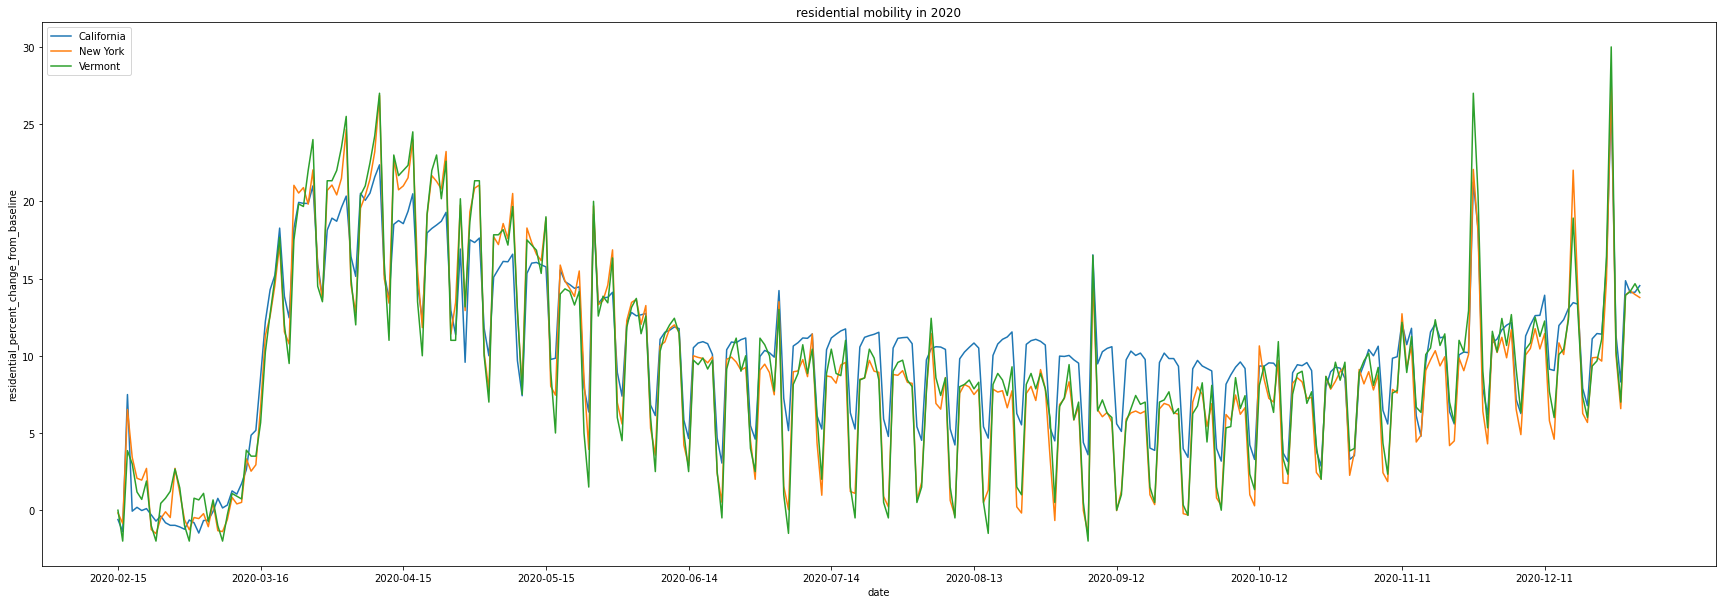

In [ ]:
plt.figure(figsize=(30,10))
plt.plot('date', 'residential_percent_change_from_baseline', data=grouped_ca, label = 'California')
plt.plot('date', 'residential_percent_change_from_baseline', data=grouped_ny, label = "New York")
plt.plot('date', 'residential_percent_change_from_baseline', data=grouped_vmt, label = 'Vermont')
plt.xlabel('date')
plt.ylabel('residential_percent_change_from_baseline')
plt.xticks(np.arange(0, len(grouped_ca), step=30))
plt.title('residential mobility in 2020')
plt.legend(loc='upper left');

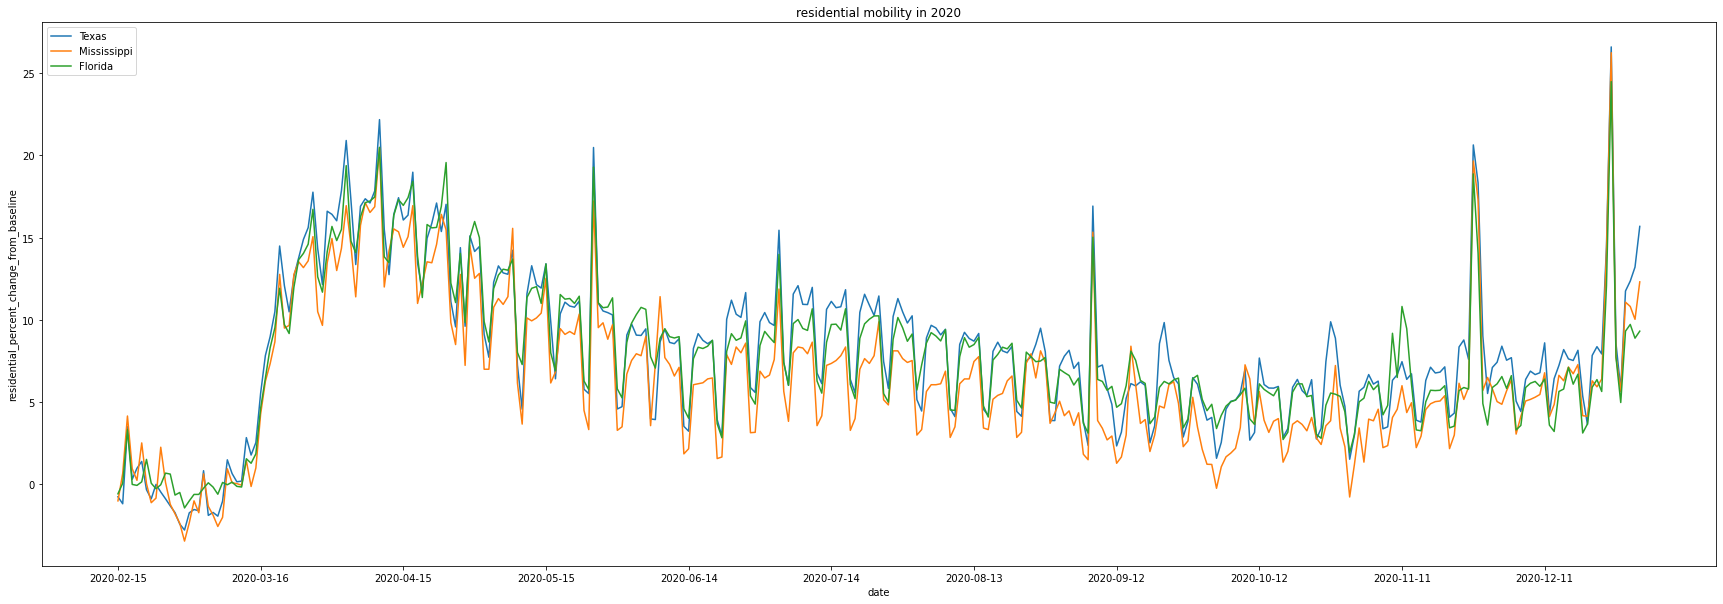

In [ ]:
plt.figure(figsize=(30,10))
plt.plot('date', 'residential_percent_change_from_baseline', data=grouped_tex, label = 'Texas')
plt.plot('date', 'residential_percent_change_from_baseline', data=grouped_mis, label = "Mississippi")
plt.plot('date', 'residential_percent_change_from_baseline', data=grouped_fl, label = 'Florida')
plt.xlabel('date')
plt.ylabel('residential_percent_change_from_baseline')
plt.xticks(np.arange(0, len(grouped_ca), step=30))
plt.title('residential mobility in 2020')
plt.legend(loc='upper left');

The peak near the beginning of the year in February is likely due to the public holiday Presidents' Day. As evidenced in the graphs above, once the stay-at-home orders are put in place in these states from late-March to early-April, there is a large increase in mobility within individuals' place of residence as individuals began quarantining at home. The consistent, weekly spikes are likely due to the fact that baselines are calculated on a daily basis. Thus, the peaks are during the work week, when more people were at home than prior to the pandemic and thus, the percent change is higher; however, on the weekdays, mobility at home is more common, thus the dips are focused on the weekdays when home mobility is similar to pre-pandemic life. Additionally, it is interesting to point out that as time progresses into the summer months and some of these stay at home orders are modified or lifted, the percent changes start to trend more towards the baseline.

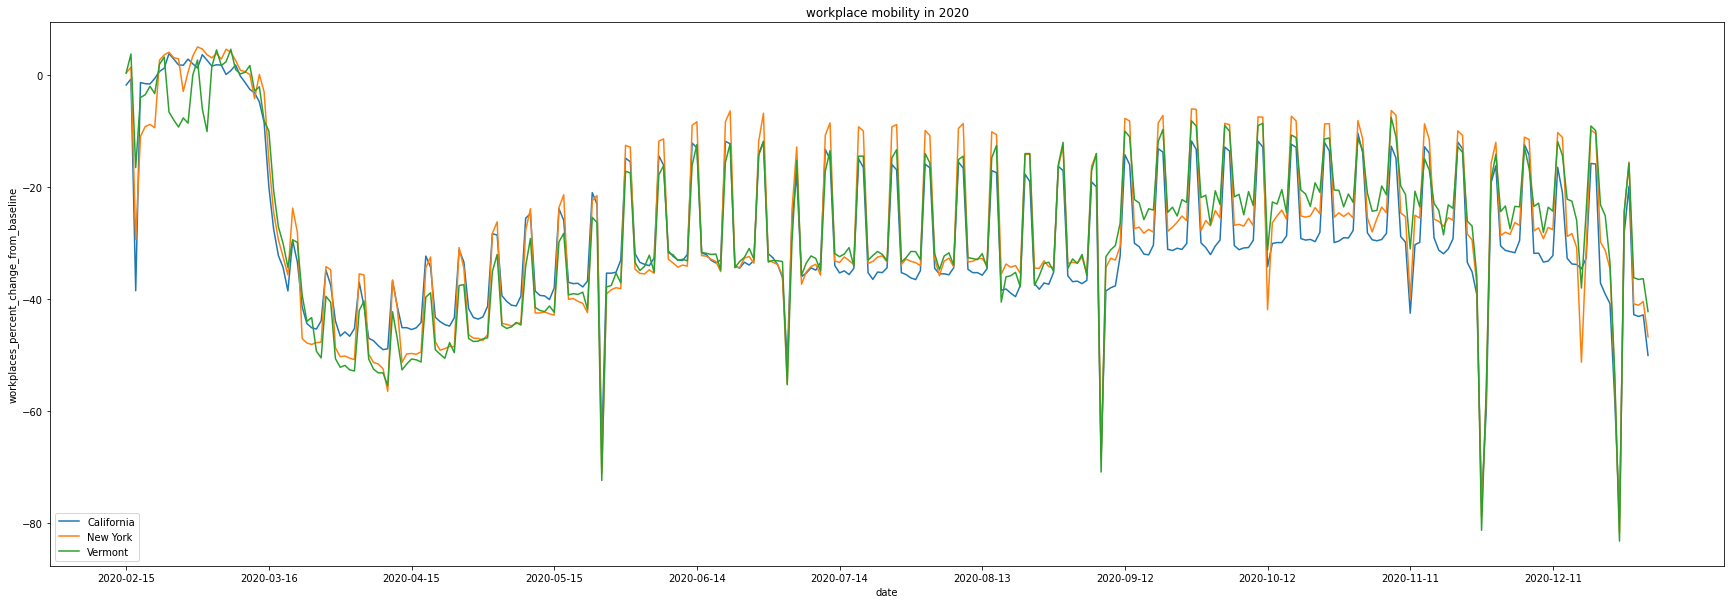

In [ ]:
plt.figure(figsize=(30,10))
plt.plot('date', 'workplaces_percent_change_from_baseline', data=grouped_ca, label= 'California')
plt.plot('date', 'workplaces_percent_change_from_baseline', data=grouped_ny, label = "New York")
plt.plot('date', 'workplaces_percent_change_from_baseline', data=grouped_vmt, label = 'Vermont')
plt.xlabel('date')
plt.ylabel('workplaces_percent_change_from_baseline')
plt.xticks(np.arange(0, len(grouped_ca), step=30))
plt.title('workplace mobility in 2020')
plt.legend(loc='lower left');

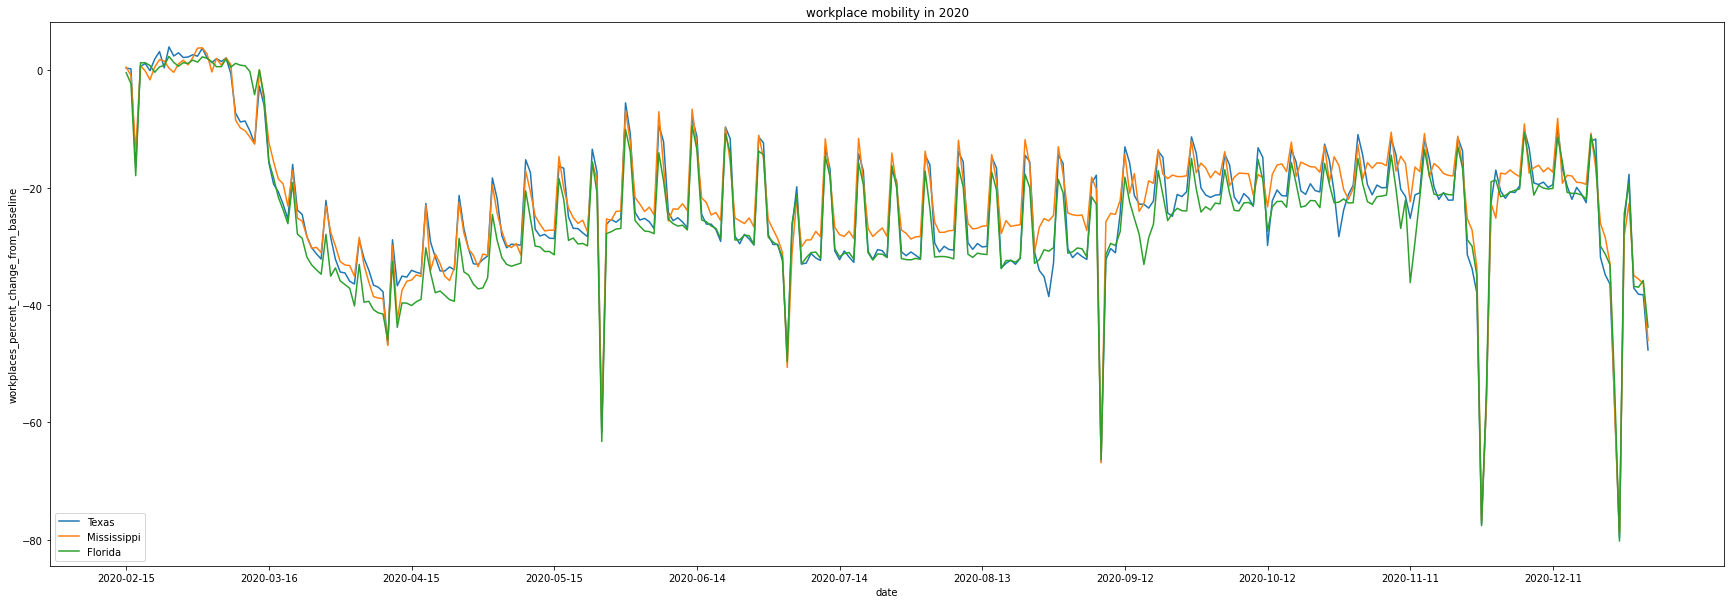

In [ ]:
plt.figure(figsize=(30,10))
plt.plot('date', 'workplaces_percent_change_from_baseline', data=grouped_tex, label= 'Texas')
plt.plot('date', 'workplaces_percent_change_from_baseline', data=grouped_mis, label = "Mississippi")
plt.plot('date', 'workplaces_percent_change_from_baseline', data=grouped_fl, label = 'Florida')
plt.xlabel('date')
plt.ylabel('workplaces_percent_change_from_baseline')
plt.xticks(np.arange(0, len(grouped_ca), step=30))
plt.title('workplace mobility in 2020')
plt.legend(loc='lower left');

The first big dip in the graph around February is likely President's Day, when many people had off from work on a weekday. The graph overall trends down around mid-March, it would be interesting to see if this was a result of the stay at home order that was put in place. After that point, the valleys in the graph represent weekdays, where the percent change is larger because many people normally frequent workplaces during the week but then do not due to COVID. The peaks represent weekends, that are closer to the baseline because there is not as big a difference in people not frequenting workplaces on weekends since many already did not when the baseline was set. The more democratic states look to have larger gaps between how their weekday and weekend work mobility relates to the baseline compared to the more republican states.

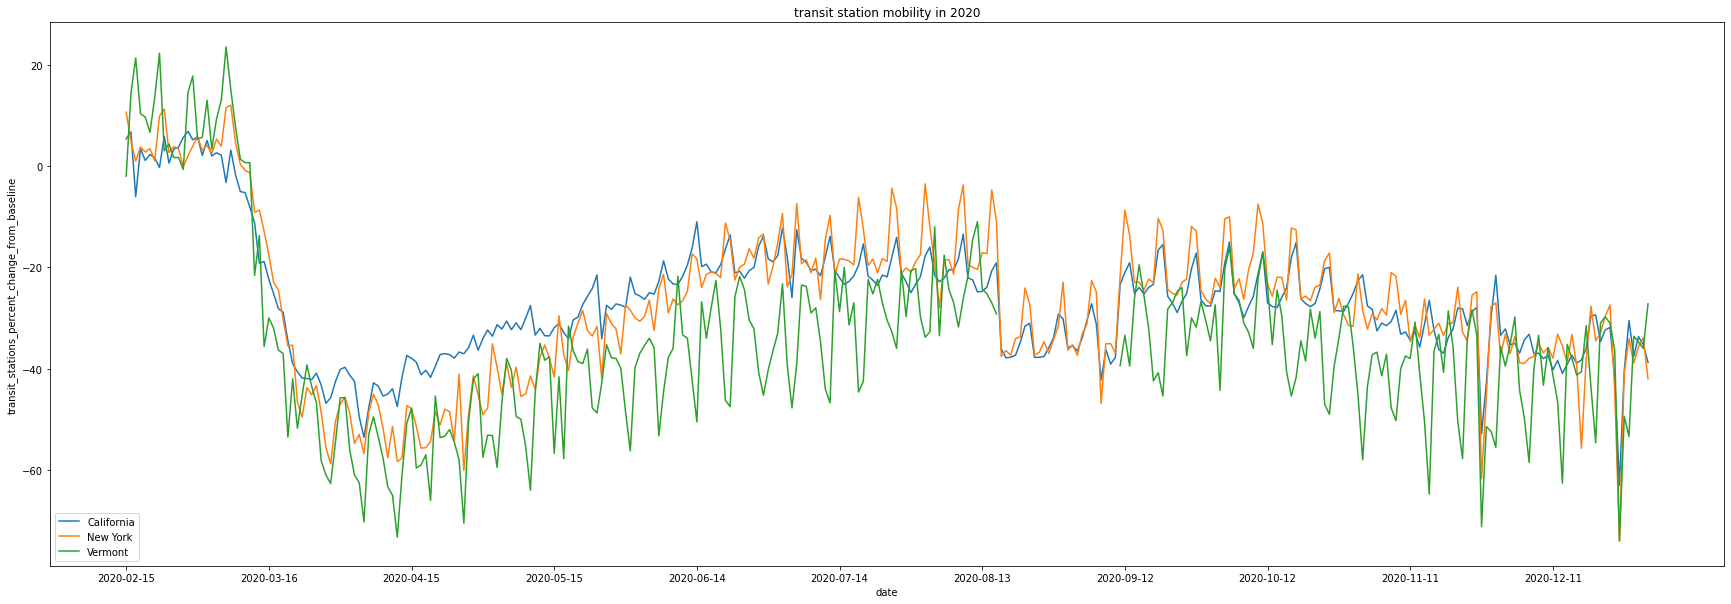

In [ ]:
plt.figure(figsize=(30,10))
plt.plot('date', 'transit_stations_percent_change_from_baseline', data=grouped_ca, label= 'California')
plt.plot('date', 'transit_stations_percent_change_from_baseline', data=grouped_ny, label = "New York")
plt.plot('date', 'transit_stations_percent_change_from_baseline', data=grouped_vmt, label = 'Vermont')
plt.xlabel('date')
plt.ylabel('transit_stations_percent_change_from_baseline')
plt.xticks(np.arange(0, len(grouped_ca), step=30))
plt.title('transit station mobility in 2020')
plt.legend(loc='lower left');

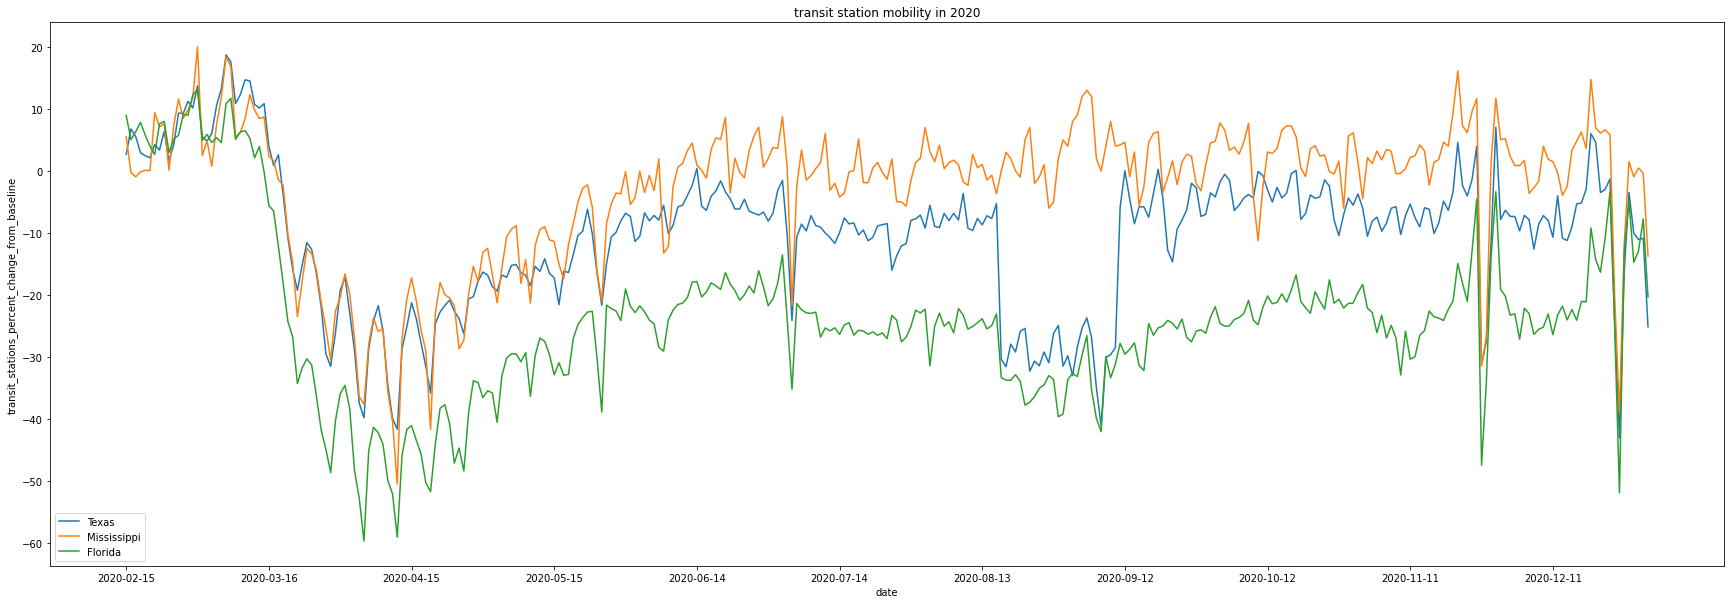

In [ ]:
plt.figure(figsize=(30,10))
plt.plot('date', 'transit_stations_percent_change_from_baseline', data=grouped_tex, label= 'Texas')
plt.plot('date', 'transit_stations_percent_change_from_baseline', data=grouped_mis, label = "Mississippi")
plt.plot('date', 'transit_stations_percent_change_from_baseline', data=grouped_fl, label = 'Florida')
plt.xlabel('date')
plt.ylabel('transit_stations_percent_change_from_baseline')
plt.xticks(np.arange(0, len(grouped_ca), step=30))
plt.title('transit station mobility in 2020')
plt.legend(loc='lower left');

Compared to the other 2 graphs, these transit station mobility graphs follow much less of a trend for weekends and weekdays, as it really varies when people frequent transit stations. This variability leads to a lot more noticeable differences from the baseline between each state, especially in the second graph which includes Texas, Mississippi and Florida. There is a noticeable decline from the transit station baseline in both graphs in mid-March and early-April when stay-at-home orders were put in place. The blue states in the first of these graphs do not reach the baseline all of 2020. On the other hand, the red states in the second graph actually pass the transit station mobility baseline, especially Mississippi, towards the end of 2020.

<AxesSubplot:>

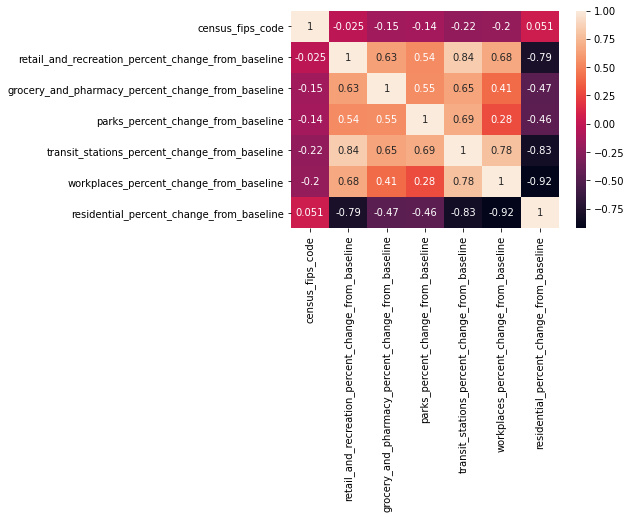

In [ ]:
corr_df = grouped_ca.corr()
sns.heatmap(corr_df, annot=True)

Significant Multicollinear Relationships: 

* Positive correlation between grocery &amp; pharmacy percent mobility and retail &amp; recreational movement (0.63)

* Positive correlation between transit stations movement and retail &amp; recreational movement (0.84)

* Negative correlation between residential movement and workplace mobility (-0.92)

* Negative correlation between retail &amp; recreation mobility and residential movement (-0.79)

* Negative correlation between transit stations movement and residential movement (-0.83)

## Methods: Causal Inference

**Causal Inference Method**: Average Treatment Effect

**Treatment**: Stay-at-home order

California: March 19 - August 28

Texas: April 2 - April 30

Florida: April 3 - May 4

New York: March 22 - May 15th

Vermont: March 25 - May 15

Mississippi: April 3 - April 27

Stay at Home start: https://www.nbcnews.com/health/health-news/here-are-stay-home-orders-across-country-n1168736

Stay at Home end: https://abcnews.go.com/US/list-states-stay-home-order-lifts/story?id=70317035; https://www.huschblackwell.com/newsandinsights/50-state-update-on-expirations-of-shelter-in-place


**Outcome**: Mobility change from baseline for workplaces, residence, and grocery/pharmacy.

**Counfounding Variables:**

-  *Socioeconomic Status*: Individuals from a lower socioeconomic status may not have the luxury to abide by the stay at home order as they need means to obtain income. Furthermore, those coming from a higher socioeconomic status are likely in professional roles that offer resources or options to work remotely. Thus, communities with more individuals from a lower socioeconomic bracket may have more movement.

- *Essential Workers classification*: The brunt of the COVID-19 burden fell on essential workers (ex. police, doctors, grocery workers, delivery person/courier, etc.). These individuals continued working (some even working more) throughout the pandemic. 

- (Colliding factor) *Cultural movement and events*: There were several widespread cultural movements that coincided with the length of the stay-at-home order, most notably the Black Lives Matter protests after George Floyd's death in June. These events led to several individuals congregating together and may have led to an uptick in mobility outside the residential area.  

- *Personal Beliefs of COVID-19*: Different counties may possess different opinions and beliefs about COVID-19 and its validity and thus, their compliance to the stay-at-home order. While this may not be considered an important confounding variable if analyzing by county, it could have a larger effect when analyzing mobility data as a state, given that there may be larger deviations between counties based on the residents' beliefs on COVID-19. This was most evident in the differences in compliance with the stay at home order between South California (which required further regulations and saw strong opposition at local city council meetings) and North California.

- *Public Holidays*: The baseline was determined in Jan 3, 2020 – Feb 6, 2020, during which there tends to be more movement as most are returning from holiday season. As a result, any decrease in movement may be exaggerated due to a higher baseline average.

- *Vulnerable Populations/COVID-19 Paranoia*: Communities with a higher number of immuno-comprimised individuals or those more vulnerable to COVID-19 due to chronic illnesses or old age will tend to show lower mobility. As a result, it is difficult to determine if it is the fear of COVID-19 or the stay-at-home order that encouraged individuals to remain at home. 

**Unconfoundedness Assumption:**

The unconfoundedness assumption does not hold. There are many factors that cannot be observed or controlled for that impact people's decisions on whether to stay at their residence during the stay at home order such as whether or not to go to work, buy groceries, travel to see loved ones, etc.

**Methods to adjust for confounders:**

In order to adjust for these confounders, we tried to select a variety of states. For example, some states vary in socioeconomic status within themselves and also compared to other states (i.e. Mississippi has a low median household income, California has a relatively high median household income). Additionally, we looked to select states that vary in political views, which can play into the confounder of personal beliefs about COVID. Texas, Florida, and Mississippi were red states in the 2020 Presidential Election. California, Vermont, and New York were blue states in the same election. These states all also vary in population. Unfortunately, the data that we have does not include any confounders that can be used in a method such as regression. Holidays are pretty sporadic so it is probably best to look at the individual dates these occur as outliers in the data. In future analysis of this topic, it would be useful to have more data for the confounders listed above so that we can run methods to better adjust for these. 

## Analysis

In [ ]:
def state_df(df, start_date):
    pre_t = df[df['date'] < start_date].tail(24)
    post_t = df[df['date'] >= start_date].head(24)
    return pre_t, post_t

### Preparing data

In [ ]:
ca_pre_t, ca_post_t = state_df(grouped_ca, '2020-03-19')
ca_pre_t.tail() 
ca_post_t.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
33,2020-03-19,6058.392857,-26.285714,7.142857,-1.627907,-28.863636,-34.350877,15.217391
34,2020-03-20,6058.392857,-37.267857,-2.263158,-10.652174,-34.488889,-38.526316,18.266667
35,2020-03-21,6058.563636,-45.357143,-12.053571,-17.041667,-39.000000,-29.490909,13.850000
36,2020-03-22,6058.563636,-45.303571,-16.875000,-9.404255,-40.615385,-33.400000,12.457143
37,2020-03-23,6058.392857,-38.660714,-15.105263,-23.068182,-41.840909,-41.368421,18.266667


In [ ]:
tx_pre_t, tx_post_t = state_df(grouped_tex, '2020-04-02')
tx_pre_t.tail()
tx_post_t.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
47,2020-04-02,48257.582160,-31.629032,-8.785714,-18.900000,-22.870000,-35.944162,17.860465
48,2020-04-03,48256.691589,-37.479592,-11.520000,-37.245902,-28.910891,-36.408163,20.902439
49,2020-04-04,48258.478673,-46.654450,-19.684729,-58.485714,-37.437500,-28.848101,17.260000
50,2020-04-05,48256.574879,-42.765027,-20.321608,-40.145161,-39.804348,-32.020000,13.363636
51,2020-04-06,48256.754902,-36.739583,-16.555556,-28.529412,-28.673469,-33.994898,16.906977


In [ ]:
fl_pre_t, fl_post_t = state_df(grouped_fl, '2020-04-03')
fl_pre_t.head() 
fl_post_t.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
48,2020-04-03,12067.910448,-42.692308,-12.424242,-43.200000,-48.279070,-40.147059,19.375000
49,2020-04-04,12067.924242,-46.738462,-16.424242,-47.037736,-52.790698,-33.064516,14.785714
50,2020-04-05,12067.924242,-52.523810,-24.515152,-57.000000,-59.690476,-39.516129,14.078947
51,2020-04-06,12067.910448,-44.916667,-21.440000,-40.702128,-45.093023,-39.352941,16.265306
52,2020-04-07,12067.910448,-43.958333,-19.019608,-37.212766,-41.333333,-40.779412,17.122449


In [ ]:
ny_pre_t, ny_post_t = state_df(grouped_ny, '2020-03-22')
ny_pre_t.tail() 
ny_post_t.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
36,2020-03-22,36062.344262,-42.306452,-9.806452,26.740741,-46.588235,-28.064516,10.766667
37,2020-03-23,36062.344262,-53.419355,-27.209677,-48.730769,-49.567568,-47.000000,21.037037
38,2020-03-24,36062.344262,-44.935484,-15.177419,4.357143,-43.735294,-47.806452,20.537037
39,2020-03-25,36062.344262,-44.903226,-16.258065,-10.280000,-45.166667,-48.064516,20.890909
40,2020-03-26,36062.344262,-40.161290,-11.129032,55.047619,-43.297297,-47.725806,19.818182


In [ ]:
mis_pre_t, mis_post_t = state_df(grouped_mis, '2020-04-03')
mis_pre_t.tail() 
mis_post_t.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
48,2020-04-03,28083.441558,-23.453125,9.492958,-13.500000,-27.045455,-35.102564,16.941176
49,2020-04-04,28084.859155,-44.761905,-11.028169,-35.600000,-36.388889,-28.444444,14.500000
50,2020-04-05,28086.072464,-40.421053,-12.642857,-17.375000,-37.666667,-33.160000,11.400000
51,2020-04-06,28081.986667,-36.523810,-10.705882,-20.555556,-27.900000,-36.026667,15.750000
52,2020-04-07,28083.441558,-38.142857,-9.833333,-29.875000,-23.714286,-38.551282,17.125000


In [ ]:
vmt_pre_t, vmt_post_t = state_df(grouped_vmt, '2020-03-25')
vmt_pre_t.tail() 
vmt_post_t.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
39,2020-03-25,50014.0,-39.461538,-4.153846,-3.5,-43.500000,-43.266667,19.666667
40,2020-03-26,50014.0,-53.846154,-28.692308,23.0,-46.750000,-49.266667,22.000000
41,2020-03-27,50014.0,-55.615385,-29.538462,4.0,-58.166667,-50.466667,24.000000
42,2020-03-28,50014.5,-60.230769,-32.923077,-4.0,-61.000000,-39.461538,14.500000
43,2020-03-29,50014.5,-63.846154,-39.461538,-56.0,-62.666667,-40.538462,13.500000


### Obtaining before &amp; after treatment means

In [ ]:
avg_ca_pre_t = ca_pre_t.mean().values
avg_tx_pre_t = tx_pre_t.mean().values
avg_fl_pre_t = fl_pre_t.mean().values
avg_ny_pre_t = ny_pre_t.mean().values
avg_vmt_pre_t = vmt_pre_t.mean().values
avg_mis_pre_t = mis_pre_t.mean().values

In [ ]:
avg_ca_post_t = ca_post_t.mean().values
avg_tx_post_t = tx_post_t.mean().values
avg_fl_post_t = fl_post_t.mean().values
avg_ny_post_t = ny_post_t.mean().values
avg_vmt_post_t = vmt_post_t.mean().values
avg_mis_post_t = mis_post_t.mean().values
avg_mis_post_t

array([ 2.80842468e+04, -3.09584939e+01, -7.06250126e+00, -2.00475694e+01,
       -2.79947688e+01, -3.43004065e+01,  1.45033402e+01])

In [ ]:
def create_ate_df(col_ind):
    df = pd.DataFrame(columns=['state'], data=['California', 'Texas', 
    'Florida', 'New York', 'Vermont', 'Mississippi'])
    
    df['pre'] = [avg_ca_pre_t[col_ind], 
    avg_tx_pre_t[col_ind],avg_fl_pre_t[col_ind],avg_ny_pre_t[col_ind],
    avg_vmt_pre_t[col_ind],avg_mis_pre_t[col_ind]]

    df['post'] = [avg_ca_post_t[col_ind], 
    avg_tx_post_t[col_ind],avg_fl_post_t[col_ind],avg_ny_post_t[col_ind],
    avg_vmt_post_t[col_ind],avg_mis_post_t[col_ind]]

    df_t = df.transpose()
    df_t.columns = df_t.iloc[0]


    return df_t.tail(2)

In [ ]:
def ate(df):
    diff = df.loc['post'] - df.loc['pre']
    ney = np.mean(df.loc['post']) - np.mean(df.loc['pre'])
    return diff, ney

In [ ]:
retail_rec = create_ate_df(1)
retail_state_ate, retail_ate = ate(retail_rec)

groceries_pharm = create_ate_df(2)
groceries_state_ate, groceries_ate = ate(groceries_pharm)

parks = create_ate_df(3)
parks_state_ate, parks_ate = ate(parks)

transit = create_ate_df(4)
transit_state_ate, transit_ate = ate(transit)

workplace = create_ate_df(5)
workplace_state_ate, workplace_ate = ate(workplace)

residence = create_ate_df(6)
residence_state_ate, residence_ate = ate(residence)

residence

state,California,Texas,Florida,New York,Vermont,Mississippi
pre,1.804949,9.574781,9.154745,3.385163,5.453815,8.53859
post,18.16987,16.287464,15.940829,19.31405,20.415972,14.50334


### Plotting ATEs

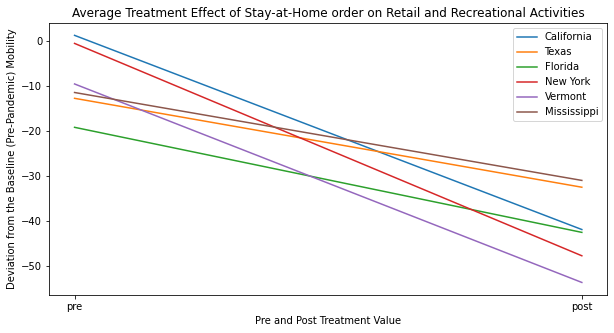

In [ ]:
plt.figure(figsize=(10,5))

for s in retail_rec.columns:
    plt.plot(retail_rec[s], label = s)
plt.title('Average Treatment Effect of Stay-at-Home order on Retail and Recreational Activities')
plt.xlabel('Pre and Post Treatment Value')
plt.ylabel('Deviation from the Baseline (Pre-Pandemic) Mobility')
plt.legend();

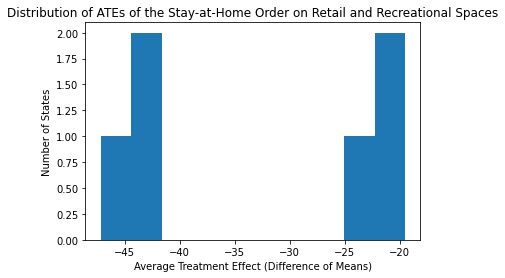

In [ ]:
plt.hist(retail_state_ate)
plt.title('Distribution of ATEs of the Stay-at-Home Order on Retail and Recreational Spaces')
plt.xlabel('Average Treatment Effect (Difference of Means)')
plt.ylabel('Number of States');

With the exception of Florida, in all states, movement related to retail and recreational spaces decreased after the stay-at-home order was placed. However, Vermont, New York, and California saw more drastic reductions in activity than Texas and Mississippi.  

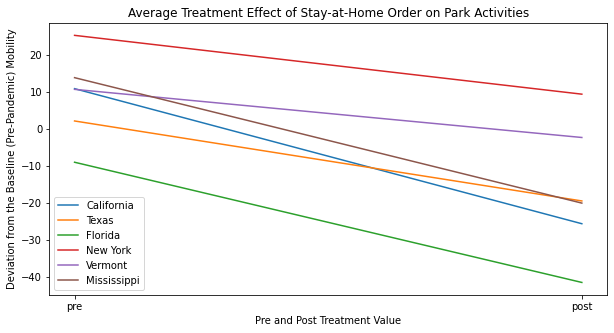

In [ ]:
plt.figure(figsize=(10,5))

for s in parks.columns:
    plt.plot(parks[s], label = s)
plt.title('Average Treatment Effect of Stay-at-Home Order on Park Activities')
plt.xlabel('Pre and Post Treatment Value')
plt.ylabel('Deviation from the Baseline (Pre-Pandemic) Mobility')
plt.legend();

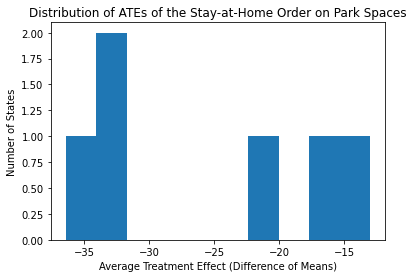

In [ ]:
plt.hist(parks_state_ate)
plt.title('Distribution of ATEs of the Stay-at-Home Order on Park Spaces')
plt.xlabel('Average Treatment Effect (Difference of Means)')
plt.ylabel('Number of States');

With the exception of Florida, all states saw a decline in movement in park spaces, though California and Mississippi saw a greater decline in comparison to other states. 

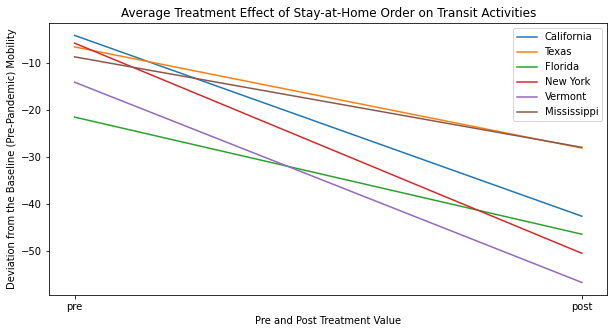

In [ ]:
plt.figure(figsize=(10,5))

for s in transit.columns:
    plt.plot(transit[s], label = s)
plt.title('Average Treatment Effect of Stay-at-Home Order on Transit Activities')
plt.xlabel('Pre and Post Treatment Value')
plt.ylabel('Deviation from the Baseline (Pre-Pandemic) Mobility')
plt.legend();

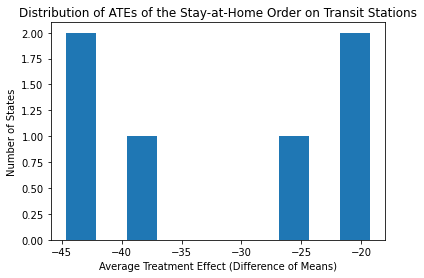

In [ ]:
plt.hist(transit_state_ate)
plt.title('Distribution of ATEs of the Stay-at-Home Order on Transit Stations')
plt.xlabel('Average Treatment Effect (Difference of Means)')
plt.ylabel('Number of States');

With the exception of Florida, all states had a reduce in movement at transit stations. Vermont, New York, and California saw a greater decline than Texas and Mississippi. 

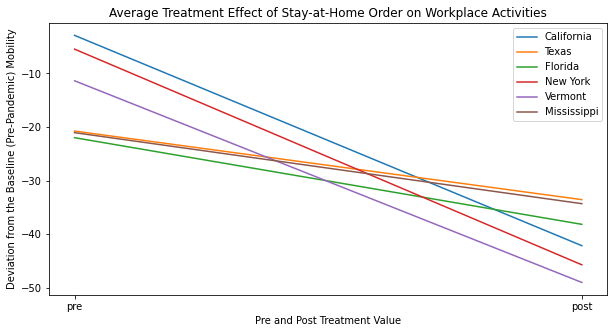

In [ ]:
plt.figure(figsize=(10,5))

for s in workplace.columns:
    plt.plot(workplace[s], label = s)
plt.title('Average Treatment Effect of Stay-at-Home Order on Workplace Activities')
plt.xlabel('Pre and Post Treatment Value')
plt.ylabel('Deviation from the Baseline (Pre-Pandemic) Mobility')
plt.legend();

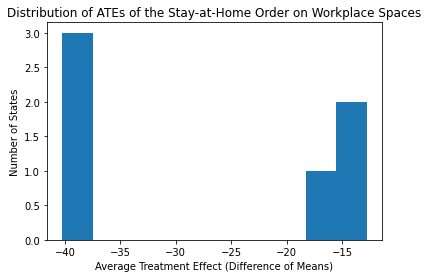

In [ ]:
plt.hist(workplace_state_ate)
plt.title('Distribution of ATEs of the Stay-at-Home Order on Workplace Spaces')
plt.xlabel('Average Treatment Effect (Difference of Means)')
plt.ylabel('Number of States');

With the exception of Florida, all states saw a decline in movement within workplace settings. Vermont, California, and New York had the greatest declines while Texas and Mississippi only saw a minimal decline.

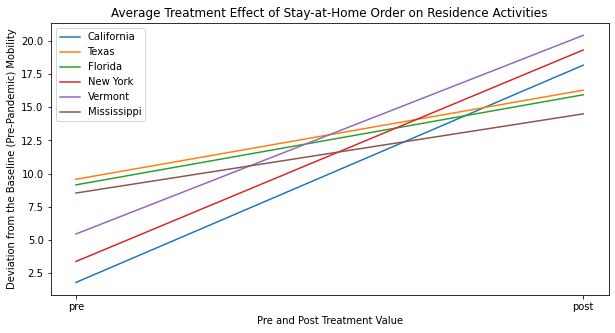

In [ ]:
plt.figure(figsize=(10,5))

for s in residence.columns:
    plt.plot(residence[s], label = s)
plt.title('Average Treatment Effect of Stay-at-Home Order on Residence Activities')
plt.xlabel('Pre and Post Treatment Value')
plt.ylabel('Deviation from the Baseline (Pre-Pandemic) Mobility')
plt.legend();

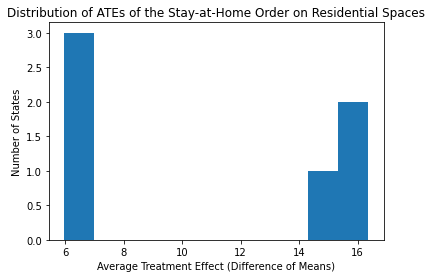

In [ ]:
plt.hist(residence_state_ate)
plt.title('Distribution of ATEs of the Stay-at-Home Order on Residential Spaces')
plt.xlabel('Average Treatment Effect (Difference of Means)')
plt.ylabel('Number of States');

All states saw an increase in movement in residential spaces, though California, New York and Vermont saw the steepest increases. 

### ATE interpretations

In [ ]:
print('Retail and Recreational ATE:', retail_ate)

print('Groceries and Pharmacy ATE:', groceries_ate)

print('Parks ATE:', parks_ate)

print('Transit Station ATE:', transit_ate)

print('Workplace Space ATE:', workplace_ate)

print('Residential Area ATE:', residence_ate)

Retail and Recreational ATE: -32.83328357325783
Groceries and Pharmacy ATE: -22.354542548462263
Parks ATE: -25.52092845493609
Transit Station ATE: -31.886755907949087
Workplace Space ATE: -26.56056563547733
Residential Area ATE: 11.119914074778226


- Within the first 24 days of the stay-at-home order, on average, there was a 23% decrease in movement compared to the baseline movement in retail and recreational spaces. 

- Within the first 24 days of the stay-at-home order,, on average, there was about a 17% decrease in movement compared to the baseline movement in groceries and pharmacies. 

- Within the first 24 days of the stay-at-home order, on average, there was approximately 16% decrease in movement compared to the baseline movement in park spaces. 

- Within the first 24 days of the stay-at-home order, on average, there was a 21% decrease in movement compared to the baseline movement in transit stations. 

- Within the first 24 days of the stay-at-home order, on average, there was a nearly 18% decrease in movement compared to the baseline movement in workplace settings. 

- Within the first 24 days of the stay-at-home order, on average, there was an 11% increase in movement compared to the baseline movement in residential areas. 

# Results + Discussion

Overall, the enforcement of stay-at-home orders did lead to a decrease in movement from the baseline/normal activity in public spaces, most significantly in retail and recreational spaces and transit stations (implying travel across and out of states also decreased). However, in the case of Florida, movement increased in activity generally higher than the pre-pandemic baseline in all measured public spaces. Meanwhile, there was an above than normal amount of activity in residential areas after the stay-at-home order was ordered. 

Provided that there were not counterfactuals, the baseline was assumed to be counterfactual in this case. However, in order to obtain a more precise conclusion regarding the effectiveness of stay-at-home orders, mobility deviations must be compared with states of similar ideologies and populations. Furthermore, while a diverse range of states were chosen to measure the average treatment effect, a significant difference in the effectiveness of the stay-at-home order was evidenced; specifically in the case Florida, which exhibited an increase in movement in all public and residential spaces. This is a case of an ecological fallacy, as when the data is aggregated, the overlaid trend exhibits that the stay-at-home order was effective in reducing mobility; however, this was not the case in states like Florida (and at a lesser extent, Texas and Mississippi).

In order to address this, and better understand the causal relationship of the stay-at-home order, data from a counterfactual environment (i.e. what would mobility patterns exhibit in a similar state without a stay-at-home-order?) would be necessary. While there were 5 states that never enforced stay-at-home orders, using these states as a point of comparison would have led to unreliable conclusions as these states were very similar in population density and political ideologies, and thus, would not have been representative of a counterfactual environment in states like California or New York.   

As mentioned previously, the data that we used does not include any quantifiable/measruable confounders that can be used in a method such as regression, and thus limits our ability to estimate the effect of the stay-at-home orders for the states we looked at. Access to these confounders would be very useful in answering this causal question as there may be other factors that lead to people staying at home that we are not currently adjusting for.

### Conclusion

The goal of this study was to better understand the causal inference relationship as it pertains to the effectiveness of stay-at-home orders. In this analysis, six states (California, New York, Texas, Florida, Vermont, and Mississippi) were chosen to represent a diversity of demographics, population densities, and political ideologies. It was found that in all six states, a stay-at-home order did lead to a higher number of people remaining in their residential spaces. Meanwhile, as it pertains to public spaces like workplaces, retail &amp; recreational, parks, groceries &amp; pharmacies, and transit stations, California, New York and Vermont saw a greater reduction in mobility patterns than Texas and Mississippi. On the contrary, in the case of Florida, movement increased dramatically in all measured public spaces. Though the stay-at-home order appeared to be effective in the majority of states that were analyzed, the case of the ecological fallacy in Florida illustrates that with varying demographics from state-to-state, the stay-at-home order may not have the intended effect. 

For this research question, we did not merge different data sources. Though this may have been able to supply us with access to confounders, data for those variables may have been difficult to come by. Additionally, a drawback to merging data would be the units not lining up since the data we used deviates from an unknown baseline. Also without going to an individual level, merging this data with confounders would run the risk of overgeneralizing across the population.

For future studies, it would be useful to have data pertaining to essential workers classification and personal beliefs of COVID since these are potential confounders to the analysis done in our study. In order to truly analyze the ATE for the stay-at-home order, we would need a counterfactual, since the set of 2021 dates to compare to is only a handfull of weeks before the stay-at-home orders were put in place. This counterfactual would be data from the same states in the same months we are analyzing but from 2020. Furthermore, in order to gain a better understanding of stay-at-home orders from a wider persepctive, it would be fruitful to additionally analyze the effectiveness stay-at-home and lockdowns in other countries to account for changes in demographics, beliefs, and governmental systems. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aee3517b-1ab0-4bab-a6ae-ba2838c44a91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>